# Implement The Linear Regression ML Models




In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'1.6.1'

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# data read
path =r"/content/drive/MyDrive/0.self_course_content_data_science/10.machine learning/Cleaned_data.csv"
df = pd.read_csv(path,encoding="utf-8")
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [ ]:
df.shape

(13320, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
 6   bhk         13320 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 728.6+ KB


In [ ]:
# 2nd way
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
# task 1 transform applying
# columns transform
columns_trans = ColumnTransformer(
    [('onehot_location', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['location']),
     ('onehot_area_type', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["area_type"]),
     ('scaler', StandardScaler(), ["total_sqft", "bath"]),

     ],
    remainder='passthrough')
# task 2 model apply
# model
lr = LinearRegression()

In [ ]:
#pipeline
pipe = make_pipeline(columns_trans,lr)

In [ ]:
pipe

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)
y_pred

array([-21.38926386,  99.1724759 ,  88.68288232, ..., 107.54939043,
        54.24757811, 156.13436132])

# Performance Matrix
Measuring Performance metrics-Lost and Cost Function (MAE,MSE,RMSE,R2 Score)

In [ ]:
# cost functions --> calculate erros
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",root_mean_squared_error(y_test,y_pred))

MAE: 39.88365353737961
MSE: 8798.113443139086
RMSE: 93.79825927563414


In [ ]:
# Regression Performance check using r2_score ,and Adjusted r2 score
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,y_pred)
r_squared

# https://benjaminobi.medium.com/what-really-is-r2-score-in-linear-regression-20cafdf5b87c

0.5867594610287408

In [ ]:
# adjusted_r2
n_samples = df.shape[0]
n_features = df.shape[1]


In [ ]:
adjusted_r2 = 1 - (1 - r_squared) * (n_samples - 1) / (n_samples - n_features - 1)
adjusted_r2
# https://www.shiksha.com/online-courses/articles/adjusted-r-squared/

0.5865421620674427

In [ ]:
# save the movel for future use
import pickle
pickle.dump(pipe,open("model.pkl","wb"))

In [ ]:
locations = df["location"].unique()
locations
# save the data for future use
pickle.dump(locations, open("locations.pkl","wb"))

In [ ]:
# carpet area
carpet_area = df["area_type"].unique()
carpet_area
# save the data for future use
pickle.dump(carpet_area, open("area_type.pkl","wb"))

In [ ]:
# load the model
pipe = pickle.load(open("model.pkl","rb"))

In [ ]:
# # load the model
# pipe = pickle.load(open("model.pkl","rb"))

# # take input from user
# location = input("Enter location: ")
# area_type = input("Enter area type: ")
# total_sqft = float(input("Enter total square feet: "))
# bath = float(input("Enter number of bathrooms: "))
# bhk = int(input("Enter number of bedrooms (BHK): "))
# balcony = int(input("Enter number of balcony: "))

# # Create a DataFrame from user input
# user_input = pd.DataFrame([[location, area_type, total_sqft, bath, bhk,balcony]],
#                           columns=['location', 'area_type', 'total_sqft', 'bath', 'bhk',"balcony"])

# # Predict the price
# predicted_price = pipe.predict(user_input)

# print(f"The predicted price is: {predicted_price[0]:.2f} Lakhs")
# # Electronic City Phase II

### Topics
- Assumptions of Machine Learning(all ready done)
- Simple linear regression
- multiple linear regression
- variant of LR for RIDGE, LASSO ,ELASTICNET
- Measuring Performance metrics-Lost and Cost Function Model Evaluation Metrics ( MSE, MAE, RMSE)(R²-score, Adjusted R²-score)

variant of Linear models
- Polynomial Regression
- Linear Regression with OLS
- Linear Regression with SGD

- Under fitting and Overfitting
- Regularization ,Lasso & Ridge


# assumption In Linear Regression

- Homoscedasticity

The variance of residuals should be approximately equal for all predicted values of the dependent variable.

- Normality - Errors are normally distributed

The residuals should be normally distributed.Linear relationship

There is a linear relationship between the dependent and independent variables

The error terms are normally distributed and the data do not contain outliers

- Independence of errors

The residual errors are independent of each other.

- No or low multicollinearity

There is no or little collinearity among input variables

#
https://www.geeksforgeeks.org/machine-learning/assumptions-of-linear-regression/
https://www.kdnuggets.com/2021/02/machine-learning-assumptions.html

![](https://media.geeksforgeeks.org/wp-content/uploads/20241025105428904464/Assumptions-of-Linear-Regression.webp)


<!-- #### MultiColiniarity
(optional)

- What it is

Multicollinearity occurs when independent variables are correlated, which can make it difficult to estimate each variable's relationship with the outcome variable.

- Why it's a problem

Multicollinearity can negatively impact model predictions on unseen data, and can make it difficult to explain the model's behavior.

- How to detect it

A correlation matrix can help identify multicollinearity, but a heatmap of correlations can be more intuitive. A variance inflation factor (VIF) can also be used to measure the amount of multicollinearity.

- How to address it

If multicollinearity is detected, it can be addressed by using a VIF to identify the correlated variables, and then removing or transforming those variables


from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target


#multicollinearity>> when one feature is explained by all other features
#when two features>> correlation
#more than two features>> vif, clustermap

sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)

#clustermap table shows group(cluster ) relationship
plt.figure(figsize = (5, 5))
sns.clustermap(df.corr(), vmin = -1, vmax =1, annot = True)

### What is the function of variance_inflation_factor?
Variance Inflation Factor (VIF)

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results.


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif

vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

df1 = df.copy()

df1.drop("Longitude", axis=1, inplace=True)
df1
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

df1.drop("AveRooms", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

df1.drop("Latitude", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

Recursive Feature Elimination (RFE) is a feature selection method that iteratively removes features and trains a model on the remaining ones, evaluating its performance at each step. By repeatedly eliminating the least important features, RFE identifies the features that contribute most to the model's accuracy. It's a valuable tool for simplifying models and improving their efficiency.

#RFE >> recruseive feature elimination
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression(), n_features_to_select=6)

rfe.fit(X, y)

rfe.predict(X)

rfe.support_

X.columns

rfe.ranking_

 -->
reviosion codes inside this markdown

In [ ]:
# 2nd way
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

## 1. Simple Linear Regression

- y=mx +c
single feature use

## 2. Multiple Linear Regression

- multiple  feature/X use
- y =M1x1 +M2x2 + M3x3 + MnXn +c

## 4. Ridge Regression

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
# pipe_lr = make_pipeline(columns_trans, lr)
pipe_ridge = make_pipeline(columns_trans, Ridge(alpha=1.0))

pipe_ridge.fit(X_train, y_train)
y_pred_ridge = pipe_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


print(f"Ridge Regression MSE: {mse_ridge:.4f}")

Ridge Regression MSE: 8428.0596


In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
pipe_lasso = make_pipeline(columns_trans, Lasso(alpha=0.1))


pipe_lasso.fit(X_train, y_train)
y_pred_lasso = pipe_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso:.4f}")

Lasso Regression MSE: 8945.5431


In [ ]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
pipe_elastic_net = make_pipeline(columns_trans, ElasticNet(alpha=0.1, l1_ratio=0.5))


pipe_elastic_net.fit(X_train, y_train)
y_pred_elastic_net = pipe_elastic_net.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

print(f"Elastic Net Regression MSE: {mse_elastic_net:.4f}")

Elastic Net Regression MSE: 10178.0360


In [ ]:
# # Polynomial Regression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score

# # Use the existing ColumnTransformer and your training data
# # Create a pipeline with ColumnTransformer, PolynomialFeatures, and LinearRegression
# # You can adjust the degree of the polynomial
# pipe_poly = make_pipeline(columns_trans, PolynomialFeatures(degree=2, include_bias=False), LinearRegression())

# # Fit the pipeline to the training data
# pipe_poly.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred_poly = pipe_poly.predict(X_test)

# # Evaluate the model
# mse_poly = mean_squared_error(y_test, y_pred_poly)
# r2_poly = r2_score(y_test, y_pred_poly)

# print(f"Polynomial Regression MSE: {mse_poly:.4f}")
# print(f"Polynomial Regression R-squared: {r2_poly:.4f}")

### 3. polynomial Regression

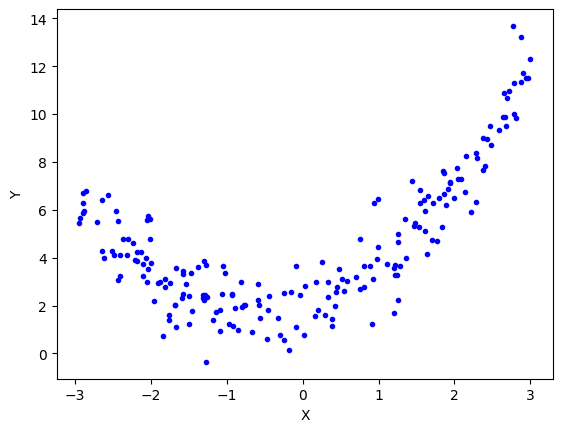

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

0.3902661828354177


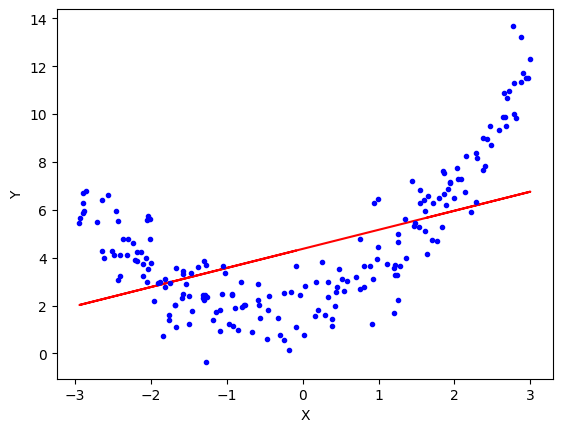

In [ ]:
# Simple linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
# polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

print(lr.coef_)
print(lr.intercept_)

0.9395333114306725
[[0.         0.87836084 0.80410224]]
[2.02269041]


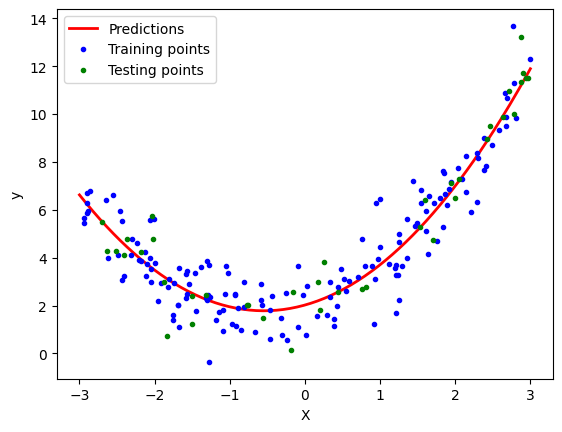

In [ ]:
# image show
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## ⚙️ **SGD: Stochastic Gradient Descent**

**SGD (Stochastic Gradient Descent)** is an **optimization algorithm** used to *find the best weights* for models like Linear Regression.

Normally, in Linear Regression, you could compute the exact solution using a formula (called the **Normal Equation**).
But with **large datasets** or **many features**, that becomes slow or memory-intensive.

Instead, we use **SGD**, which updates the model step-by-step using small portions of data (even one sample at a time).

---

### 🔢 **How it works**

1. Start with random weights.
2. Pick one (or a small batch of) training sample(s).
3. Compute the **prediction** and the **error** (difference between prediction and actual value).
4. Adjust the weights slightly in the direction that **reduces the error** (using the gradient).
5. Repeat for many epochs (passes through the dataset).

The update rule:
wi:=wi-∂Loss/η∂wi

Where:

* η = learning rate (controls how big each step is)
* (∂Loss/∂wi ) = gradient (slope of the loss function)

---

## 📈 **So: “Linear Regression with SGD” means**

> Training a **linear regression model** using the **stochastic gradient descent** optimization method instead of the closed-form normal equation.

---

### 🧠 **Example in Python (using scikit-learn)**

```python
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load example data
X, y = load_boston(return_X_y=True)

# Split and scale data (important for SGD)
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression with SGD
model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01)
model.fit(X_train, y_train)

# Evaluate
print("Model coefficients:", model.coef_)
print("Model score (R²):", model.score(X_test, y_test))
```

---


## 4. Linear Regression with SGD

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. Load data
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Linear Regression (Batch-style - closed form)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, pred_lr)


In [ ]:


# 4. Stochastic Gradient Descent
sgd = SGDRegressor(loss='squared_error', penalty=None, learning_rate='constant', eta0=0.01, max_iter=1000, random_state=42)
sgd.fit(X_train_scaled, y_train)
pred_sgd = sgd.predict(X_test_scaled)
mse_sgd = mean_squared_error(y_test, pred_sgd)

# 5. Mini-Batch Gradient Descent (simulated with SGDRegressor)
sgd_mini = SGDRegressor(loss='squared_error', penalty=None, learning_rate='invscaling', eta0=0.01, power_t=0.25,
                        max_iter=1000, tol=1e-3, random_state=42)
sgd_mini.fit(X_train_scaled, y_train)
pred_mini = sgd_mini.predict(X_test_scaled)
mse_mini = mean_squared_error(y_test, pred_mini)

# 6. Results
print("Mean Squared Error Comparison:")
print(f"Linear Regression (Batch): {mse_lr:.4f}")
print(f"Stochastic Gradient Descent (SGD): {mse_sgd:.4f}")
print(f"Mini-Batch Gradient Descent (SGD Simulated): {mse_mini:.4f}")

# 5.Linear Regression with OLS


## 📘 **Linear Regression with Ordinary Least Squares (OLS)**

### 🔹 1. **Concept**

**Linear Regression** is one of the simplest and most widely used statistical models in Machine Learning.
It models the relationship between one or more independent variables (features) and a dependent variable (target) by fitting a **straight line (or hyperplane)** through the data.

---

### 🔹 2. **Model Equation**

For **multiple linear regression**:


---

### 🔹 3. **Ordinary Least Squares (OLS)**

OLS is the **method used to estimate the coefficients ((\beta_i))** of the regression equation.

It finds the values of (\beta) that **minimize the sum of squared residuals** (differences between actual and predicted values):


Minimize i=1∑n​(yi​−yi​^​)2
or equivalently in matrix form:

[
\hat{\beta} = (X^T X)^{-1} X^T y
]

Where:

* ( X ) = matrix of input features (including a column of 1s for intercept)
* ( y ) = vector of outputs
* ( \hat{\beta} ) = estimated coefficients

---

### 🔹 4. **Steps to Perform OLS Regression**

1. Collect data ((X, y))
2. Add an intercept term (column of ones)
3. Compute coefficients using
   [
   \hat{\beta} = (X^T X)^{-1} X^T y
   ]
4. Predict outputs:
   [
   \hat{y} = X\hat{\beta}
   ]
5. Evaluate the model using metrics like ( R^2 ), RMSE, MAE, etc.

---

### 🔹 5. **Assumptions of Linear Regression (OLS)**

OLS relies on several assumptions:

| **Assumption**           | **Meaning**                            | **Example of Violation**                   |
| ------------------------ | -------------------------------------- | ------------------------------------------ |
| **Linearity**            | Relationship between X and y is linear | Using a straight line to model curved data |
| **Independence**         | Observations are independent           | Time series data with autocorrelation      |
| **Homoscedasticity**     | Constant variance of errors            | Variance of residuals increases with X     |
| **Normality of Errors**  | Residuals are normally distributed     | Heavy-tailed error distribution            |
| **No Multicollinearity** | Predictors are not highly correlated   | Two features are nearly identical          |

---

### 🔹 6. **Model Evaluation Metrics**

* **R² (Coefficient of Determination)**:
  [
  R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
  ]
  Measures how well the regression line fits the data.

* **Mean Squared Error (MSE):**
  [
  MSE = \frac{1}{n} \sum (y_i - \hat{y_i})^2
  ]

* **Root Mean Squared Error (RMSE):**
  [
  RMSE = \sqrt{MSE}
  ]

---

### 🔹 7. **Advantages**

✅ Simple and easy to interpret
✅ Computationally efficient
✅ Works well for linearly related data

---

### 🔹 8. **Limitations**

❌ Sensitive to outliers
❌ Performs poorly on non-linear relationships
❌ Assumes all assumptions (e.g., homoscedasticity, independence) are satisfied

---

### 🔹 9. **Example (Simple Linear Regression)**

[
y = 2 + 3x + \epsilon
]

If data is:

| x | y  |
| - | -- |
| 1 | 5  |
| 2 | 8  |
| 3 | 11 |

The OLS method would estimate:
[
\beta_0 = 2, \ \beta_1 = 3
]
so predictions are ( \hat{y} = 2 + 3x ).

---

Would you like me to show a **Python implementation** of Linear Regression using OLS (both manually and with `scikit-learn`)?


In [ ]:
import numpy as np

# Sample Data
# X: Independent variable(s)
# y: Dependent variable
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Add a column of ones to include the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape -> (n_samples, 2)

# OLS Formula: β = (XᵀX)⁻¹ Xᵀy
beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Coefficients
intercept, slope = beta_hat
print("Intercept:", intercept)
print("Slope:", slope)

# Predictions
y_pred = X_b.dot(beta_hat)

# Model Evaluation (R² Score)
ss_total = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y - y_pred)**2)
r2 = 1 - (ss_res / ss_total)

print("Predictions:", y_pred)
print("R² Score:", r2)


## 6. Under fitting and Overfitting
- for underfitting --> cross check data , or Assumtions , or model , or Do CrossValidations

- Regularization ,Lasso & Ridge  --> for Overfitting
- Also do --> Cross Validations for Overfiiting